In [5]:
import glob, os

folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
matls = ['greentea', 'moli', 'wulong', 'water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt', 'colanosugar', 'cola']

## 都是50
for d in [1, 6, 7, 8, 9]:
    for matl in matls:
        df_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' %(d, matl)))
        if len(df_f) != 50 or len(df_t) != 50:
            print(d, matl)

## 都是50
for file in glob.glob(os.path.join(folder_clean, '*.csv')):
    df = pd.read_csv(file)
    if len(df) != 50:
        print(file, len(df))

D:\Atom\python\data\cleaned\grill\final\d10_oil_p_f_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_oil_p_t_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_waterrotate_f_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_waterrotate_t_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_watertag_f_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_watertag_t_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_water_f_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_water_p_f_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_water_p_t_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_water_t1_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_water_t2_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d10_water_t_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d1_colanosugar_f_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d1_colanosugar_t_kde.csv 50
D:\Atom\python\data\cleaned\grill\final\d1_cola_f_kde.csv 50
D:\Atom\python\data\cle

In [7]:
label = {'greentea': 4, 'moli': 5, 'wulong': 6, 'water': 3, 'vinegar': 2, 'milk': 7, 'oil': 1, 'liquor': 8, 'yogurt': 9, 'colanosugar': 10, 'cola': 11, 'empty': 12}

In [48]:
# matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
matls = ['water', 'vinegar', 'milk', 'oil', 'liquor', 'yogurt']
d_p = []
d_r = []
f = []
y = []
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd1_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd1_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    
    d_p.extend(diff_p)
    d_r.extend(diff_r)
    f.extend(df_f['CHANNEL'].values)
    y.extend(np.repeat([matl], len(diff_p)))
    
X = np.column_stack((d_p, d_r, f))

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(X, y)

water ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water']
Correct 1.0
-------------------------------
vinegar ['vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar']
Correct 1.0
--------------

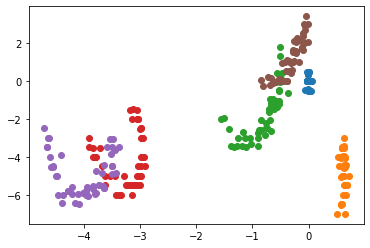

In [49]:
cnt = 0
correctcnt = 0
for matl in matls:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd1_%s_f_kde.csv' % (matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd1_%s_t_kde.csv' %(matl)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
    result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))

#     result = tree.predict(np.column_stack((diff_p, diff_r)))
    print(matl, result)
    correct = (result==matl).sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')

print(correctcnt, cnt, correctcnt/cnt)
    